In [6]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline

In [7]:
n=pypsa.Network("elec_s_37_lv1.5__Co2L0-24H-T-H-B-I-A-solar+p3-dist1_2030.nc")

Index(['agriculture machinery oil'], dtype='object', name='name')
INFO:pypsa.io:Imported network elec_s_37_lv1.5__Co2L0-24H-T-H-B-I-A-solar+p3-dist1_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


### General Info

(<matplotlib.collections.PatchCollection at 0x7f820248dd50>,
 <matplotlib.collections.LineCollection at 0x7f82021a5a20>)

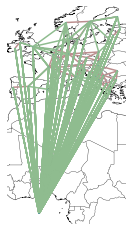

In [8]:
n.plot()

In [9]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component {} has {} entries".format(c.name,len(c.df)))

Component Bus has 601 entries
Component Carrier has 30 entries
Component GlobalConstraint has 3 entries
Component Line has 52 entries
Component LineType has 32 entries
Component TransformerType has 14 entries
Component Link has 1823 entries
Component Load has 526 entries
Component Generator has 373 entries
Component StorageUnit has 50 entries
Component Store has 339 entries


### Total Electricity

In [10]:
#n.loads_t.p_set.loc[n.loads_t.p_set["carrier"]=='land transport EV']
n.loads_t.p_set.filter(regex="0$").sum().sum()/1e6
#total load

71.69531475927766

In [11]:
costs = pd.read_csv("../csvs/costs.csv",skiprows=3)
costs.columns = ["category","cost type","source","cost"]
costs["cost"].sum()/1e9
#cost in billions

757.7281799036483

In [13]:
n.snapshots[:10]

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [14]:
n.generators.head()

,p_nom_max,weight,p_nom,capital_cost,bus,efficiency,carrier,marginal_cost,p_nom_extendable,control,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
AL1 0 offwind-ac,3.365876e+03,342.416715,0.0,186422.926285,AL1 0,1.0,offwind-ac,0.024920,True,Slack,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 onwind,5.447238e+04,1422.004419,0.0,109387.167462,AL1 0,1.0,onwind,0.025793,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 ror,inf,48.200000,48.2,270940.715283,AL1 0,0.9,ror,0.009380,False,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 solar,6.219769e+04,3227.580730,0.0,47990.943749,AL1 0,1.0,solar,0.019412,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AT1 0 onwind,1.097188e+05,5063.045014,0.0,109387.167462,AT1 0,1.0,onwind,0.025034,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [15]:
n.loads.head()

,bus,carrier,p_set,type,q_set,sign
Load,,,,,,
AL1 0,AL1 0 low voltage,electricity,0.0,,0.0,-1.0
AT1 0,AT1 0 low voltage,electricity,0.0,,0.0,-1.0
BA1 0,BA1 0 low voltage,electricity,0.0,,0.0,-1.0
BE1 0,BE1 0 low voltage,electricity,0.0,,0.0,-1.0
BG1 0,BG1 0 low voltage,electricity,0.0,,0.0,-1.0


In [16]:
n.loads[:]["carrier"].unique()

array(['electricity', 'land transport EV', 'land transport fuel cell',
       'residential rural heat', 'services rural heat',
       'residential urban decentral heat',
       'services urban decentral heat', 'urban central heat',
       'solid biomass for industry', 'gas for industry',
       'H2 for industry', 'H2 for shipping', 'naphtha for industry',
       'kerosene for aviation', 'oil emissions',
       'low-temperature heat for industry', 'industry electricity',
       'process emissions', 'agriculture electricity', 'agriculture heat',
       'agriculture machinery oil', 'agriculture machinery oil emissions'],
      dtype=object)

In [17]:
n.loads.loc[n.loads["carrier"]=='land transport EV']

,bus,carrier,p_set,type,q_set,sign
Load,,,,,,
AL1 0 land transport EV,AL1 0 EV battery,land transport EV,0.0,,0.0,-1.0
AT1 0 land transport EV,AT1 0 EV battery,land transport EV,0.0,,0.0,-1.0
BA1 0 land transport EV,BA1 0 EV battery,land transport EV,0.0,,0.0,-1.0
BE1 0 land transport EV,BE1 0 EV battery,land transport EV,0.0,,0.0,-1.0
BG1 0 land transport EV,BG1 0 EV battery,land transport EV,0.0,,0.0,-1.0
CH1 0 land transport EV,CH1 0 EV battery,land transport EV,0.0,,0.0,-1.0
CZ1 0 land transport EV,CZ1 0 EV battery,land transport EV,0.0,,0.0,-1.0
DE1 0 land transport EV,DE1 0 EV battery,land transport EV,0.0,,0.0,-1.0
DK1 0 land transport EV,DK1 0 EV battery,land transport EV,0.0,,0.0,-1.0


In [18]:
n.loads_t.p_set.head()

Load,AL1 0,AL1 0 land transport EV,AL1 0 land transport fuel cell,AL1 0 residential rural heat,AL1 0 residential urban decentral heat,AL1 0 services rural heat,AL1 0 services urban decentral heat,AL1 0 urban central heat,AT1 0,AT1 0 land transport EV,...,SI1 0 services urban decentral heat,SI1 0 urban central heat,SK1 0,SK1 0 land transport EV,SK1 0 land transport fuel cell,SK1 0 residential rural heat,SK1 0 residential urban decentral heat,SK1 0 services rural heat,SK1 0 services urban decentral heat,SK1 0 urban central heat
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01,262.129150,207.980280,73.426449,334.474948,142.119943,82.699546,35.139417,305.772396,2751.519275,2282.634699,...,168.332025,1149.256650,996.308211,720.718706,254.470205,1469.656695,850.321338,968.271132,560.227165,2433.196168
2013-01-02,298.412826,212.105971,74.914498,310.219912,131.813867,76.509425,32.509206,283.457301,3495.697811,2312.872989,...,155.567923,1067.663965,1206.691508,743.019876,262.435773,1500.910004,868.404034,990.027984,572.815354,2486.103444
2013-01-03,305.749451,214.295390,75.701906,298.886131,126.998091,73.616934,31.280174,273.030007,3623.694713,2345.025342,...,141.996066,980.907825,1293.645998,745.953809,263.342325,1371.392984,793.467427,899.865286,520.648568,2266.850090
2013-01-04,293.680288,229.406441,81.281823,313.196596,133.078674,77.429185,32.900017,286.313241,3655.044170,2401.853629,...,133.299456,924.015516,1375.159019,761.010004,269.663900,1017.091038,588.473631,654.583524,378.732216,1668.430087
2013-01-05,275.323879,176.586611,62.230978,309.703990,131.594649,76.377757,32.453260,282.982643,3280.291499,1839.000424,...,106.443731,753.644638,1256.148826,588.478150,207.470676,1079.267123,624.447782,696.503165,402.986293,1772.323779


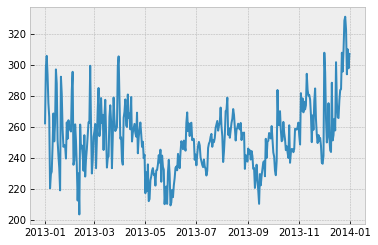

In [19]:
plt.plot(n.loads_t.p_set["AL1 0"])

<AxesSubplot:xlabel='snapshot'>

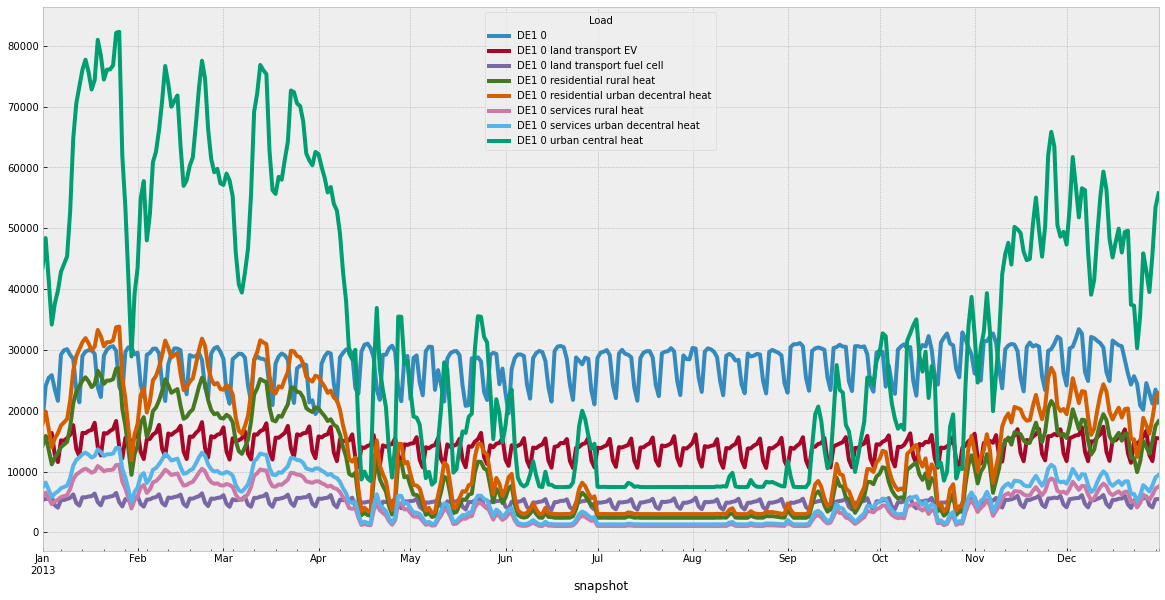

In [20]:
de_data = n.loads_t.p_set.filter(regex="^DE")
de_data.plot(figsize=[20,10],linewidth=4)

In [21]:
de_data.sum()

Load
DE1 0                                     1.007641e+07
DE1 0 land transport EV                   5.210734e+06
DE1 0 land transport fuel cell            1.839082e+06
DE1 0 residential rural heat              3.899954e+06
DE1 0 residential urban decentral heat    4.886331e+06
DE1 0 services rural heat                 1.616307e+06
DE1 0 services urban decentral heat       2.025104e+06
DE1 0 urban central heat                  1.192222e+07
dtype: float64

In [22]:
n.loads_t.p_set.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=365, freq=None)